<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1991]:
#importation de la librairie NumPy
import numpy as np

In [1992]:
#Importation de la librairie Pandas
import pandas as pd


In [1993]:
#Importation de la librairie plotly express
import plotly.express as px

In [1994]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

pd.set_option("display.max_columns", None)

In [1995]:
import warnings
warnings.simplefilter('ignore')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [1997]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [2000]:
df_erp.info
print (df_erp.info)

<bound method DataFrame.info of      product_id  onsale_web  price  stock_quantity stock_status  \
0          3847           1   24.2              16      instock   
1          3849           1   34.3              10      instock   
2          3850           1   20.8               0   outofstock   
3          4032           1   14.1              26      instock   
4          4039           1   46.0               3   outofstock   
..          ...         ...    ...             ...          ...   
820        7203           0   45.0              30      instock   
821        7204           0   45.0               9      instock   
822        7247           1   54.8               6      instock   
823        7329           0   26.5              14      instock   
824        7338           1   16.3              40      instock   

     purchase_price  
0             12.88  
1             17.54  
2             10.64  
3              6.92  
4             23.77  
..              ...  
820      

In [2001]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [2002]:
#Consulter le nombre de colonnes
df_erp.shape[1]
print ("Il y a " + str(df_erp.shape[1]) + " colonnes dans ERP ")
#La nature des données dans chacune des colonnes
df_erp.dtypes
print (df_erp.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print(df_erp.count())

Il y a 6 colonnes dans ERP 
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object
product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64


In [2003]:
#Afficher les 5 premières lignes de la table
(df_erp.head(5))
print (df_erp.head(5))

   product_id  onsale_web  price  stock_quantity stock_status  purchase_price
0        3847           1   24.2              16      instock           12.88
1        3849           1   34.3              10      instock           17.54
2        3850           1   20.8               0   outofstock           10.64
3        4032           1   14.1              26      instock            6.92
4        4039           1   46.0               3   outofstock           23.77


In [2004]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
sum_doublons = df_erp.duplicated(subset=['product_id'],keep='first').sum()
print ("Il y a " + str(sum_doublons) + " doublons dans la colonne product_id")

Il y a 0 doublons dans la colonne product_id


In [2005]:
#Afficher les valeurs distinctes de la colonne stock_status
(df_erp['stock_status'].unique())
print ("Les valeurs de la colonne stock_status sont " + str((df_erp['stock_status'].unique())) + ".")
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
df_erp.loc[df_erp['stock_quantity'] == 0, 'stock_status'] = 'outofstock'
df_erp.loc[df_erp['stock_quantity'] > 0, 'stock_status'] = 'instock'

print ("Le statut du stock est lié a la quantité disponible en stock et sera ajustée en conséquence")


Les valeurs de la colonne stock_status sont ['instock' 'outofstock'].
Le statut du stock est lié a la quantité disponible en stock et sera ajustée en conséquence


In [2006]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
df_erp['stock_status_2'] = df_erp ['stock_quantity']
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp['stock_status_2'] = np.where(df_erp['stock_quantity'] == 0, 'outofstock', 'instock')

In [2007]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0      True
1      True
2      True
3      True
4      True
       ... 
820    True
821    True
822    True
823    True
824    True
Length: 825, dtype: bool

In [2008]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
total= (df_erp["stock_status"] == df_erp["stock_status_2"]).sum()
print (("Le total est de "  + str(total) + "."),df_erp["stock_status"] == df_erp["stock_status_2"])
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset

Le total est de 823. 0      True
1      True
2      True
3      True
4      True
       ... 
820    True
821    True
822    True
823    True
824    True
Length: 825, dtype: bool


In [2009]:
df_erp["stock_status_2"] = df_erp["stock_quantity"].apply(lambda x: "instock" if x > 0 else "outofstock" )

In [2010]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, stock_status_2]
Index: []

Vérification du changement de statut sur id 4885

In [2012]:
df_erp[df_erp['product_id'] == 4885]

product_id  onsale_web  price  stock_quantity stock_status  \
398        4885           1   18.7               0   outofstock   

     purchase_price stock_status_2  
398            9.66     outofstock

In [2013]:
#Corriger la ou les données incohérentes

df_erp['stock_status_2'] = np.where(df_erp['stock_quantity'] <= 0, 'outofstock', 'instock')
total_updated = (df_erp["stock_status"] == df_erp["stock_status_2"]).sum()
#Verification en utilisant le même code que plus haut pour afficher les problemes
print ("Le total est de "  + str(total_updated) + ".")

Le total est de 825.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [2016]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
nbnull = df_erp['price'].isnull().sum()
nbzeromoins = (df_erp['price'] <= 0).sum()

print ("Il y a " + str(nbnull) + " prix non renseigné(s) et " + str(nbzeromoins) + " négatif(s) ou nul(s)).")
#Afficher le ou les prix non renseignés dans la colonne "price"
print(df_erp.loc[df_erp['price'].isnull(), ['product_id', 'price', 'purchase_price']])
#Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
df_erp['price'].min()
print ("Le prix minimum est de "+ str( df_erp['price'].min()))
#Afficher le prix maximum de la colonne "price"
df_erp['price'].max()
print ("Le prix maximum est de "+ str( df_erp['price'].max()))
#Afficher les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
print(df_erp.loc[df_erp['price'] < 0, ['product_id', 'price','purchase_price']])


Il y a 0 prix non renseigné(s) et 3 négatif(s) ou nul(s)).
Empty DataFrame
Columns: [product_id, price, purchase_price]
Index: []
Le prix minimum est de -20.0
Le prix maximum est de 225.0
     product_id  price  purchase_price
151        4233  -20.0           10.33
469        5017   -8.0            4.34
739        6594   -9.1            4.61


In [2017]:
df_erp['price'] = df_erp['price'].abs()
print("Les valeurs négatives ont été changées en absolues et cette information sera transmise aux responsable commercial, il y a " + str(nbzeromoins) +" valeurs négatives")

Les valeurs négatives ont été changées en absolues et cette information sera transmise aux responsable commercial, il y a 3 valeurs négatives


In [2018]:
print ("Après correction le prix minimum est désormais de " + str(df_erp['price'].min())) 


Après correction le prix minimum est désormais de 5.2


In [2019]:
df_erp[df_erp["product_id"] == 4233]

product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0   20.0               0   outofstock   

     purchase_price stock_status_2  
151           10.33     outofstock

In [2020]:
df_erp[df_erp["product_id"] == 5017]

product_id  onsale_web  price  stock_quantity stock_status  \
469        5017           0    8.0               0   outofstock   

     purchase_price stock_status_2  
469            4.34     outofstock

In [2021]:
df_erp[df_erp["product_id"] == 6594]

product_id  onsale_web  price  stock_quantity stock_status  \
739        6594           0    9.1              19      instock   

     purchase_price stock_status_2  
739            4.61        instock

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [2023]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print("La quantité minimum de la colonne stock_quantity est de " + str(df_erp["stock_quantity"].min()) + ".")
#Afficher la quantité maximum de la colonne "stock_quantity"
print("La quantité maximale de la colonne stock_quantity est de " + str(df_erp["stock_quantity"].max()) + ".")
#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
print (df_erp[df_erp["stock_quantity"] <= 0])

La quantité minimum de la colonne stock_quantity est de -10.
La quantité maximale de la colonne stock_quantity est de 145.
     product_id  onsale_web  price  stock_quantity stock_status  \
2          3850           1   20.8               0   outofstock   
8          4043           1   60.0               0   outofstock   
11         4047           1   18.3               0   outofstock   
15         4051           1    7.7               0   outofstock   
16         4052           1   33.7               0   outofstock   
..          ...         ...    ...             ...          ...   
723        6301           1   40.5               0   outofstock   
726        6327           0   28.5               0   outofstock   
752        6632           1   52.7               0   outofstock   
774        6900           0   30.0               0   outofstock   
775        6901           0   20.0               0   outofstock   

     purchase_price stock_status_2  
2             10.64     outofstock 

In [2024]:
print ("Il y a  " + str(len(df_erp[df_erp["stock_quantity"] <= 0])) + " produits sans stock ou indiqué en négatif, l'information doit être communiqué au responsable des stocks pour vérification.")

Il y a  92 produits sans stock ou indiqué en négatif, l'information doit être communiqué au responsable des stocks pour vérification.


In [2025]:
df_erp.loc[df_erp["stock_quantity"] <= 0, "stock_quantity"] = 0

Les valeurs négatives ont été remplacées par 0 (suppression des valeurs négatives)

In [2027]:
print("Il y a désormais " + str(len(df_erp[df_erp["stock_quantity"] < 0])) + " valeurs négatives et "+ str(len(df_erp[df_erp["stock_quantity"] == 0]))+" produits hors stocks, le responsable des stocks doit en être informé.")

Il y a désormais 0 valeurs négatives et 92 produits hors stocks, le responsable des stocks doit en être informé.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [2029]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
(df_erp["onsale_web"].unique())
print ("onsale_web informe de la présence ou non sur le web du produit via la présence (1) ou l'abscence de celui-ci (0).")


onsale_web informe de la présence ou non sur le web du produit via la présence (1) ou l'abscence de celui-ci (0).


#Quelles sont les colonnes à conserver selon vous?

stock status et stock status 2 peuvent être supprimées car elle font doublon a stock quantity

In [2031]:
#Supprimer la colonnecomportant le libellé "stock_status_2" car elle est redondante 
df_erp.drop("stock_status_2", axis=1, inplace=True)
#avec la colonne "stock_status".
df_erp.drop("stock_status", axis=1, inplace=True)



print ("Les colonnes stock_status et stock_status_2 ont été supprimées")
print (df_erp.info)

Les colonnes stock_status et stock_status_2 ont été supprimées
<bound method DataFrame.info of      product_id  onsale_web  price  stock_quantity  purchase_price
0          3847           1   24.2              16           12.88
1          3849           1   34.3              10           17.54
2          3850           1   20.8               0           10.64
3          4032           1   14.1              26            6.92
4          4039           1   46.0               3           23.77
..          ...         ...    ...             ...             ...
820        7203           0   45.0              30           23.48
821        7204           0   45.0               9           24.18
822        7247           1   54.8               6           27.18
823        7329           0   26.5              14           13.42
824        7338           1   16.3              40            8.00

[825 rows x 5 columns]>


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [2033]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
print ("Il y a "+str(df_erp.purchase_price.isnull().sum())+" prix non renseigné(s).")
#Afficher le prix minimum de la colonne "purchase_price"
print ("Le prix minimum de la colonne purchase_price est de "+str(df_erp.purchase_price.min()))
#Afficher le prix maximum de la colonne "purchase_price"
print ("Le prix maximum de la colonne purchase_price est de "+str(df_erp.purchase_price.max()))

Il y a 0 prix non renseigné(s).
Le prix minimum de la colonne purchase_price est de 2.74
Le prix maximum de la colonne purchase_price est de 137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [2035]:
#Dimension du dataset
print("Le tableau contient  (lignes, colonnes) :", df_web.shape)
#Nombre d'observations
print("Le tableau compte " + str(df_web.shape[0]) + " observation(s) ou article(s).")
#Nombre de caractéristiques
print("Le tableau compte " + str(df_web.shape[1]) + " observation(s) ou article(s).")


Le tableau contient  (lignes, colonnes) : (1513, 29)
Le tableau compte 1513 observation(s) ou article(s).
Le tableau compte 29 observation(s) ou article(s).


In [2036]:
sum_doublons_sku = df_web.duplicated(subset=['sku'],keep='first').sum()
print (sum_doublons_sku)

798


In [2037]:
print(df_web.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [2038]:
#La nature des données dans chacune des colonnes
print (df_web.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print (df_web.count())

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object


#Selon vous, quelles sont les colonnes à conserver ?


Les colonnes Tax_class,post_content,post_password,post_content_filtered peuvent être supprimées car vides.

#Si vous avez défini des colonnes à supprimer, effectuer l'opération
del df_web['tax_class']
del df_web['post_content']
del df_web['post_password']
del df_web['post_content_filtered']
print ("Les colonnes Tax_class,post_content,post_password,post_content_filtered sont désormais supprimées")

In [2041]:
colonnesasupprimer = ['tax_class','post_content','post_password','post_content_filtered']
for i in  colonnesasupprimer:
    df_web.drop(i,axis=1,inplace= True)
    print ("La colonne ", i ,  "est désormais supprimée")

    

La colonne  tax_class est désormais supprimée
La colonne  post_content est désormais supprimée
La colonne  post_password est désormais supprimée
La colonne  post_content_filtered est désormais supprimée


In [2042]:
#Visualisation des valeurs de la colonne sku
print (df_web["sku"].unique())
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?


[11862 16057 14692 16295 15328 15471 16515 16246 nan 13572 16513 16585
 16269 15526 12869 15575 11586 14338 15425 16560 15361 13809 11587 15022
 14323 16342 16029 15475 13754 14680 15875 9636 13849 13662 16564 13557
 15429 14712 15032 15481 15448 16580 15441 804 15300 13958 16071 15678
 13895 15711 12882 16053 13766 16247 12640 15292 15476 15670 16189 16038
 14864 16044 15324 15531 15953 15413 15733 14366 15895 15892 16472 15185
 16010 15793 15849 12315 15741 15934 15148 15781 15659 15106 15490 14507
 14149 16307 13736 14090 16037 15758 14661 12587 15337 15489 15201 16305
 16131 13435 15747 12203 14509 14768 16262 14561 16505 15717 16129 13460
 15871 15940 11602 13127 13520 15480 13032 15436 15269 15910 19821 16263
 15138 15146 15126 15482 16186 13905 16540 15856 15677 14700 15325 19815
 3506 16056 14975 15341 15204 15415 16065 15479 16151 15127 15140 15779
 15473 15530 14805 14106 9937 15281 16553 15315 15668 13211 15161 11258
 16296 12588 15792 15921 15690 15775 15577 15870 802 15163

SKU ne respectant pas la codification : 'bon-cadeau-25-euros' , nan , '13127-1' 

In [2044]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
valeurs_incorrectes = ["13127-1","bon-cadeau-25-euros"]
df_web[df_web["sku"] == "13127-1"]



sku  virtual  downloadable  rating_count  average_rating  \
272   13127-1        0             0             0             0.0   
1117  13127-1        0             0             0             0.0   

      total_sales tax_status  post_author           post_date  \
272           4.0    taxable          2.0 2020-06-09 15:42:04   
1117          4.0        NaN          2.0 2020-06-09 15:42:04   

           post_date_gmt product_type  \
272  2020-06-09 13:42:04          Vin   
1117 2020-06-09 13:42:04          Vin   

                                        post_title  \
272   Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
1117  Clos du Mont-Olivet Châteauneuf-du-Pape 2007   

                                           post_excerpt post_status  \
272   Nez gracieux, très élégant avec une touche flo...     publish   
1117                                                NaN     publish   

     comment_status ping_status  \
272          closed      closed   
1117         closed      closed   

                                           post_name       post_modified  \
272   clos-du-mont-olivet-chateauneuf-du-pape-2007-2 2020-07-20 17:09:06   
1117  clos-du-mont-olivet-chateauneuf-du-pape-2007-2 2020-07-20 17:09:06   

       post_modified_gmt  post_parent  \
272  2020-07-20 15:09:06          0.0   
1117 2020-07-20 15:09:06          0.0   

                                                   guid  menu_order  \
272   https://www.bottle-neck.fr/?post_type=product&...         0.0   
1117  https://www.bottle-neck.fr/wp-content/uploads/...         0.0   

       post_type post_mime_type  comment_count  
272      product            NaN            0.0  
1117  attachment     image/jpeg            0.0

In [2045]:
df_web[df_web["sku"] == "bon-cadeau-25-euros"]

sku  virtual  downloadable  rating_count  \
842   bon-cadeau-25-euros        0             0             0   
1387  bon-cadeau-25-euros        0             0             0   

      average_rating  total_sales tax_status  post_author           post_date  \
842              0.0          7.0        NaN          1.0 2018-06-01 13:53:46   
1387             0.0          7.0    taxable          1.0 2018-06-01 13:53:46   

           post_date_gmt product_type         post_title  \
842  2018-06-01 11:53:46        Autre  Bon cadeau de 25€   
1387 2018-06-01 11:53:46          NaN  Bon cadeau de 25€   

                                           post_excerpt post_status  \
842                                                 NaN     publish   
1387  <span style="color: #a85253;"><strong>Parlons ...     publish   

     comment_status ping_status               post_name       post_modified  \
842          closed      closed  bon-cadeau-de-25-euros 2018-06-01 14:13:57   
1387         closed      closed  bon-cadeau-de-25-euros 2018-06-01 14:13:57   

       post_modified_gmt  post_parent  \
842  2018-06-01 12:13:57          0.0   
1387 2018-06-01 12:13:57          0.0   

                                                   guid  menu_order  \
842   https://www.bottle-neck.fr/wp-content/uploads/...         0.0   
1387  https://www.bottle-neck.fr/?post_type=product&...         0.0   

       post_type post_mime_type  comment_count  
842   attachment     image/jpeg            0.0  
1387     product            NaN            0.0

Recommandations - Etablir de nouveau SKUs, supprimer doublons et vérifier liens web de :
SKU 13127-1 
bon-cadeau-25-euros

In [2047]:
#Identifier les lignes sans code articles

df_web[df_web["sku"].isnull()]


sku  virtual  downloadable  rating_count  average_rating  total_sales  \
8     NaN        0             0             0             NaN          NaN   
20    NaN        0             0             0             NaN          NaN   
30    NaN        0             0             0             NaN          NaN   
37    NaN        0             0             0             NaN          NaN   
41    NaN        0             0             0             NaN          NaN   
...   ...      ...           ...           ...             ...          ...   
1384  NaN        0             0             0             NaN          NaN   
1429  NaN        0             0             0             NaN          NaN   
1432  NaN        0             0             0             NaN          NaN   
1445  NaN        0             0             0             NaN          NaN   
1457  NaN        0             0             0             NaN          NaN   

     tax_status  post_author post_date post_date_gmt product_type post_title  \
8           NaN          NaN       NaT           NaT          NaN        NaN   
20          NaN          NaN       NaT           NaT          NaN        NaN   
30          NaN          NaN       NaT           NaT          NaN        NaN   
37          NaN          NaN       NaT           NaT          NaN        NaN   
41          NaN          NaN       NaT           NaT          NaN        NaN   
...         ...          ...       ...           ...          ...        ...   
1384        NaN          NaN       NaT           NaT          NaN        NaN   
1429        NaN          NaN       NaT           NaT          NaN        NaN   
1432        NaN          NaN       NaT           NaT          NaN        NaN   
1445        NaN          NaN       NaT           NaT          NaN        NaN   
1457        NaN          NaN       NaT           NaT          NaN        NaN   

     post_excerpt post_status comment_status ping_status post_name  \
8             NaN         NaN            NaN         NaN       NaN   
20            NaN         NaN            NaN         NaN       NaN   
30            NaN         NaN            NaN         NaN       NaN   
37            NaN         NaN            NaN         NaN       NaN   
41            NaN         NaN            NaN         NaN       NaN   
...           ...         ...            ...         ...       ...   
1384          NaN         NaN            NaN         NaN       NaN   
1429          NaN         NaN            NaN         NaN       NaN   
1432          NaN         NaN            NaN         NaN       NaN   
1445          NaN         NaN            NaN         NaN       NaN   
1457          NaN         NaN            NaN         NaN       NaN   

     post_modified post_modified_gmt  post_parent guid  menu_order post_type  \
8              NaT               NaT          NaN  NaN         NaN       NaN   
20             NaT               NaT          NaN  NaN         NaN       NaN   
30             NaT               NaT          NaN  NaN         NaN       NaN   
37             NaT               NaT          NaN  NaN         NaN       NaN   
41             NaT               NaT          NaN  NaN         NaN       NaN   
...            ...               ...          ...  ...         ...       ...   
1384           NaT               NaT          NaN  NaN         NaN       NaN   
1429           NaT               NaT          NaN  NaN         NaN       NaN   
1432           NaT               NaT          NaN  NaN         NaN       NaN   
1445           NaT               NaT          NaN  NaN         NaN       NaN   
1457           NaT               NaT          NaN  NaN         NaN       NaN   

     post_mime_type  comment_count  
8               NaN            NaN  
20              NaN            NaN  
30              NaN            NaN  
37              NaN            NaN  
41              NaN            NaN  
...             ...            ...  
1384            NaN            NaN 

In [2048]:
df_web[df_web["sku"].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   virtual            85 non-null     int64         
 2   downloadable       85 non-null     int64         
 3   rating_count       85 non-null     int64         
 4   average_rating     2 non-null      float64       
 5   total_sales        2 non-null      float64       
 6   tax_status         2 non-null      object        
 7   post_author        2 non-null      float64       
 8   post_date          2 non-null      datetime64[ns]
 9   post_date_gmt      2 non-null      datetime64[ns]
 10  product_type       2 non-null      object        
 11  post_title         2 non-null      object        
 12  post_excerpt       2 non-null      object        
 13  post_status        2 non-null      object        
 14  comment_status 

In [2049]:
df_web[df_web["sku"].isnull()][df_web["total_sales"].notnull()]



sku  virtual  downloadable  rating_count  average_rating  total_sales  \
1084  NaN        0             0             0             0.0        -56.0   
1087  NaN        0             0             0             0.0        -17.0   

     tax_status  post_author           post_date       post_date_gmt  \
1084    taxable          2.0 2018-08-08 11:23:43 2018-08-08 09:23:43   
1087    taxable          2.0 2018-07-31 12:07:23 2018-07-31 10:07:23   

     product_type                                       post_title  \
1084          Vin  Pierre Jean Villa Condrieu Jardin Suspendu 2018   
1087          Vin       Pierre Jean Villa Côte Rôtie Fongeant 2017   

                                           post_excerpt post_status  \
1084  <span id="u1194-83">Le nez séduit par ses parf...     publish   
1087  Fongeant 2017 explose sur un fruit brillant, p...     publish   

     comment_status ping_status                                   post_name  \
1084         closed      closed    pierre-jean-villa-condrieu-suspendu-2018   
1087         closed      closed  pierre-jean-villa-cote-rotie-fongeant-2017   

           post_modified   post_modified_gmt  post_parent  \
1084 2019-11-02 13:24:01 2019-11-02 12:24:01          0.0   
1087 2019-11-02 13:24:15 2019-11-02 12:24:15          0.0   

                                                   guid  menu_order post_type  \
1084  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   
1087  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   

     post_mime_type  comment_count  
1084            NaN            0.0  
1087            NaN            0.0

In [2050]:
df_web.loc[1084,"sku"] = "article_a_investiguer1"
df_web.loc[1087,"sku"] = "article_a_investiguer2"

In [2051]:
df_web[df_web["sku"] == 15665]

sku  virtual  downloadable  rating_count  average_rating  total_sales  \
1251  15665        0             0             0             0.0          7.0   
1307  15665        0             0             0             0.0          7.0   

     tax_status  post_author           post_date       post_date_gmt  \
1251    taxable          2.0 2018-02-27 10:30:04 2018-02-27 09:30:04   
1307        NaN          2.0 2018-02-27 10:30:04 2018-02-27 09:30:04   

     product_type                                         post_title  \
1251          Vin  Chermette Domaine du Vissoux Moulin à Vent Les...   
1307          Vin  Chermette Domaine du Vissoux Moulin à Vent Les...   

                                           post_excerpt post_status  \
1251  On appelle le Moulin à Vent le roi du Beaujola...     publish   
1307                                                NaN     publish   

     comment_status ping_status  \
1251         closed      closed   
1307         closed      closed   

                                              post_name       post_modified  \
1251  chermette-domaine-du-vissoux-moulin-a-vent-tro... 2020-07-28 09:45:03   
1307  chermette-domaine-du-vissoux-moulin-a-vent-tro... 2020-07-28 09:45:03   

       post_modified_gmt  post_parent  \
1251 2020-07-28 07:45:03          0.0   
1307 2020-07-28 07:45:03          0.0   

                                                   guid  menu_order  \
1251  https://www.bottle-neck.fr/?post_type=product&...         0.0   
1307  https://www.bottle-neck.fr/wp-content/uploads/...         0.0   

       post_type post_mime_type  comment_count  
1251     product            NaN            0.0  
1307  attachment     image/jpeg            0.0

In [2052]:
df_web = df_web[df_web["total_sales"].notnull()]
#suppression des lignes avec sku null

In [2053]:
#suppression des post type attachments (Les attachments semblent causer des doublons)
#On filtre sur post_type = product
df_web = df_web[df_web["post_type"] == "product"]

In [2054]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 2 to 1509
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                716 non-null    object        
 1   virtual            716 non-null    int64         
 2   downloadable       716 non-null    int64         
 3   rating_count       716 non-null    int64         
 4   average_rating     716 non-null    float64       
 5   total_sales        716 non-null    float64       
 6   tax_status         716 non-null    object        
 7   post_author        716 non-null    float64       
 8   post_date          716 non-null    datetime64[ns]
 9   post_date_gmt      716 non-null    datetime64[ns]
 10  product_type       715 non-null    object        
 11  post_title         716 non-null    object        
 12  post_excerpt       716 non-null    object        
 13  post_status        716 non-null    object        
 14  comment_status

In [2055]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
avant = len(df_web)
df_web = df_web.dropna(subset=["sku"])
apres = len(df_web)
print("Il y avait "+str(avant)+" lignes, il y a maintenant " +str(apres)+ " lignes.", f"{avant - apres} lignes sans sku ont été supprimées.")

Il y avait 716 lignes, il y a maintenant 716 lignes. 0 lignes sans sku ont été supprimées.


In [2056]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
doublonsku = df_web.duplicated().sum()
print("Il y a désormais " + str(doublonsku) + " doublon(s).")

Il y a désormais 0 doublon(s).


In [2057]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
print(df_web[df_web["sku"].isna()])
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_web.info()
#3 - Que constatez-vous?


Empty DataFrame
Columns: [sku, virtual, downloadable, rating_count, average_rating, total_sales, tax_status, post_author, post_date, post_date_gmt, product_type, post_title, post_excerpt, post_status, comment_status, ping_status, post_name, post_modified, post_modified_gmt, post_parent, guid, menu_order, post_type, post_mime_type, comment_count]
Index: []
<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 2 to 1509
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                716 non-null    object        
 1   virtual            716 non-null    int64         
 2   downloadable       716 non-null    int64         
 3   rating_count       716 non-null    int64         
 4   average_rating     716 non-null    float64       
 5   total_sales        716 non-null    float64       
 6   tax_status         716 non-null    object        
 7   post_author        716 non-null    float6

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [2059]:
#Dimension du dataset
print(df_liaison.info())
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))
#Nombre de caractéristiques
print (df_liaison.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB
None
Le tableau comporte 825 observation(s) ou article(s)
id_web        object
product_id     int64
dtype: object


In [2060]:
#Consulter le nombre de colonnes
print("Le tableau comporte {}  colonnes".format(df_liaison.shape[1]))
#La nature des données dans chacune des colonnes
print (df_liaison.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.count()

Le tableau comporte 2  colonnes
id_web        object
product_id     int64
dtype: object


id_web        734
product_id    825
dtype: int64

In [2061]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
print("Il y a " + str(df_liaison.product_id.duplicated().sum()) + " doublons dans la colonne product_id")

Il y a 0 doublons dans la colonne product_id


In [2062]:
print("Il y a " + str(df_liaison.product_id.duplicated().sum()) + " doublons et " + str(df_liaison.shape[0]) + " poduct_id uniques.")

Il y a 0 doublons et 825 poduct_id uniques.


In [2063]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
print("Il y a " + str(df_liaison.id_web.duplicated().sum()) + " doublons dans la colonne id_web")

Il y a 90 doublons dans la colonne id_web


In [2064]:
df_liaison[df_liaison.id_web.duplicated(keep= False)]

id_web  product_id
19     NaN        4055
49     NaN        4090
50     NaN        4092
119    NaN        4195
131    NaN        4209
..     ...         ...
817    NaN        7196
818    NaN        7200
819    NaN        7201
820    NaN        7203
821    NaN        7204

[91 rows x 2 columns]

In [2065]:
#Avons-nous des articles sans correspondances?
print("Il y a "+ str(df_liaison.id_web.isna().sum()) + " articles sans correspondances dans la colonne id_web et " 
      + str(df_liaison.product_id.isna().sum()) + " dans la colonne product_id")
print(df_liaison[df_liaison["id_web"].isna()]["product_id"])

Il y a 91 articles sans correspondances dans la colonne id_web et 0 dans la colonne product_id
19     4055
49     4090
50     4092
119    4195
131    4209
       ... 
817    7196
818    7200
819    7201
820    7203
821    7204
Name: product_id, Length: 91, dtype: int64


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [2068]:
print("Colonnes de df_erp :", df_erp.columns.tolist())
print("Colonnes de df_web   :", df_liaison.columns.tolist())

Colonnes de df_erp : ['product_id', 'onsale_web', 'price', 'stock_quantity', 'purchase_price']
Colonnes de df_web   : ['id_web', 'product_id']


In [2069]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp, df_liaison, on="product_id",indicator = True)
print(df_merge)

     product_id  onsale_web  price  stock_quantity  purchase_price   id_web  \
0          3847           1   24.2              16           12.88    15298   
1          3849           1   34.3              10           17.54    15296   
2          3850           1   20.8               0           10.64    15300   
3          4032           1   14.1              26            6.92    19814   
4          4039           1   46.0               3           23.77    19815   
..          ...         ...    ...             ...             ...      ...   
820        7203           0   45.0              30           23.48      NaN   
821        7204           0   45.0               9           24.18      NaN   
822        7247           1   54.8               6           27.18  13127-1   
823        7329           0   26.5              14           13.42  14680-1   
824        7338           1   16.3              40            8.00    16230   

    _merge  
0     both  
1     both  
2     both  

In [2070]:
df_merge.drop("_merge", axis=1, inplace=True)

In [2071]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?

pd.merge(df_erp, df_liaison, on="product_id", how="outer", indicator=False)

product_id  onsale_web  price  stock_quantity  purchase_price   id_web
0          3847           1   24.2              16           12.88    15298
1          3849           1   34.3              10           17.54    15296
2          3850           1   20.8               0           10.64    15300
3          4032           1   14.1              26            6.92    19814
4          4039           1   46.0               3           23.77    19815
..          ...         ...    ...             ...             ...      ...
820        7203           0   45.0              30           23.48      NaN
821        7204           0   45.0               9           24.18      NaN
822        7247           1   54.8               6           27.18  13127-1
823        7329           0   26.5              14           13.42  14680-1
824        7338           1   16.3              40            8.00    16230

[825 rows x 6 columns]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [2073]:
print("Colonnes de df_merge :", df_merge.columns.tolist())
print("Colonnes de df_web   :", df_web.columns.tolist())

Colonnes de df_merge : ['product_id', 'onsale_web', 'price', 'stock_quantity', 'purchase_price', 'id_web']
Colonnes de df_web   : ['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating', 'total_sales', 'tax_status', 'post_author', 'post_date', 'post_date_gmt', 'product_type', 'post_title', 'post_excerpt', 'post_status', 'comment_status', 'ping_status', 'post_name', 'post_modified', 'post_modified_gmt', 'post_parent', 'guid', 'menu_order', 'post_type', 'post_mime_type', 'comment_count']


In [2074]:
#Fusionnez les datasets df_merge et df_web

df_mergeweb = pd.merge(df_merge, df_web, left_on="id_web", right_on= "sku",how="outer",indicator = True)
df_mergeweb

product_id  onsale_web  price  stock_quantity  purchase_price id_web  \
0        4729.0         1.0    8.6            26.0            4.22     38   
1        4634.0         1.0   41.0            11.0           20.12     41   
2        4141.0         1.0   39.0           123.0           24.86    304   
3        5932.0         1.0   59.9            13.0           27.18    523   
4        5047.0         1.0   22.5            76.0           13.78    531   
..          ...         ...    ...             ...             ...    ...   
822      7196.0         0.0   31.0            55.0           31.20    NaN   
823      7200.0         0.0   31.0             6.0           15.54    NaN   
824      7201.0         0.0   31.0            18.0           16.02    NaN   
825      7203.0         0.0   45.0            30.0           23.48    NaN   
826      7204.0         0.0   45.0             9.0           24.18    NaN   

     sku  virtual  downloadable  rating_count  average_rating  total_sales  \
0     38      0.0           0.0           0.0             0.0         10.0   
1     41      0.0           0.0           0.0             0.0          6.0   
2    304      0.0           0.0           0.0             0.0          8.0   
3    523      0.0           0.0           0.0             0.0          0.0   
4    531      0.0           0.0           0.0             0.0          8.0   
..   ...      ...           ...           ...             ...          ...   
822  NaN      NaN           NaN           NaN             NaN          NaN   
823  NaN      NaN           NaN           NaN             NaN          NaN   
824  NaN      NaN           NaN           NaN             NaN          NaN   
825  NaN      NaN           NaN           NaN             NaN          NaN   
826  NaN      NaN           NaN           NaN             NaN          NaN   

    tax_status  post_author           post_date       post_date_gmt  \
0      taxable          2.0 2018-04-18 12:25:58 2018-04-18 10:25:58   
1      taxable          2.0 2018-04-14 12:01:43 2018-04-14 10:01:43   
2      taxable          2.0 2018-02-13 12:57:44 2018-02-13 11:57:44   
3      taxable          2.0 2019-04-06 15:25:58 2019-04-06 13:25:58   
4      taxable          2.0 2018-07-18 15:58:02 2018-07-18 13:58:02   
..         ...          ...                 ...                 ...   
822        NaN          NaN                 NaT                 NaT   
823        NaN          NaN                 NaT                 NaT   
824        NaN          NaN                 NaT                 NaT   
825        NaN          NaN                 NaT                 NaT   
826        NaN          NaN                 NaT                 NaT   

    product_type                                         post_title  \
0            Vin         Emile Boeckel Crémant Brut Blanc de Blancs   
1            Vin  Marcel Windholtz Eau de Vie de Marc de Gewurzt...   
2      Champagne                    Champagne Gosset Grande Réserve   
3         Cognac                       Cognac Normandin Mercier VFC   
4      Champagne  Champagne Petit Lebrun &amp; Fils Blanc de Bla...   
..           ...                                                ...   
822          NaN                                                NaN   
823          NaN                                                NaN   
824          NaN                                                NaN   
825          NaN                                                NaN   
826          NaN                                                NaN   

                                          post_excerpt post_status  \
0    Ce Crémant est vif et délicat, gourmand et cro...     publish   
1    Les eaux de vie naissent d'une subtile alchimi...     publish   
2    Le nez, ouvert et expressif, évoque les fruits...     publish   
3    Issus des meilleurs crus de Grande et de Petit...     publish   
4    Cuvée bien équilibrée à la fois vive et souple...     publish   
..               

In [2075]:
#Avons-nous des lignes sans correspondances?

In [2076]:
unmatched_ids = df_merge[~df_merge["id_web"].isin(df_web["sku"])] 
print(unmatched_ids)
print("Il y a " + str(unmatched_ids.shape[0]) + " product_id sans correspondance.")

     product_id  onsale_web  price  stock_quantity  purchase_price   id_web
19         4055           0   86.1               0           37.88      NaN
49         4090           0   73.0               0           33.79      NaN
50         4092           0   47.0               0           25.25      NaN
119        4195           0   14.1               0            7.36      NaN
131        4209           0   73.5               0           33.01      NaN
..          ...         ...    ...             ...             ...      ...
818        7200           0   31.0               6           15.54      NaN
819        7201           0   31.0              18           16.02      NaN
820        7203           0   45.0              30           23.48      NaN
821        7204           0   45.0               9           24.18      NaN
823        7329           0   26.5              14           13.42  14680-1

[111 rows x 6 columns]
Il y a 111 product_id sans correspondance.


In [2077]:
unmatched_sku = df_web[~df_web["sku"].isin(df_merge["id_web"])]
print(unmatched_sku)
print("Il y a " + str(unmatched_sku.shape[0]) + " sku sans correspondance.")

                         sku  virtual  downloadable  rating_count  \
1084  article_a_investiguer1        0             0             0   
1087  article_a_investiguer2        0             0             0   

      average_rating  total_sales tax_status  post_author           post_date  \
1084             0.0        -56.0    taxable          2.0 2018-08-08 11:23:43   
1087             0.0        -17.0    taxable          2.0 2018-07-31 12:07:23   

           post_date_gmt product_type  \
1084 2018-08-08 09:23:43          Vin   
1087 2018-07-31 10:07:23          Vin   

                                           post_title  \
1084  Pierre Jean Villa Condrieu Jardin Suspendu 2018   
1087       Pierre Jean Villa Côte Rôtie Fongeant 2017   

                                           post_excerpt post_status  \
1084  <span id="u1194-83">Le nez séduit par ses parf...     publish   
1087  Fongeant 2017 explose sur un fruit brillant, p...     publish   

     comment_status ping_status       

In [2078]:
unmatched_sku

sku  virtual  downloadable  rating_count  \
1084  article_a_investiguer1        0             0             0   
1087  article_a_investiguer2        0             0             0   

      average_rating  total_sales tax_status  post_author           post_date  \
1084             0.0        -56.0    taxable          2.0 2018-08-08 11:23:43   
1087             0.0        -17.0    taxable          2.0 2018-07-31 12:07:23   

           post_date_gmt product_type  \
1084 2018-08-08 09:23:43          Vin   
1087 2018-07-31 10:07:23          Vin   

                                           post_title  \
1084  Pierre Jean Villa Condrieu Jardin Suspendu 2018   
1087       Pierre Jean Villa Côte Rôtie Fongeant 2017   

                                           post_excerpt post_status  \
1084  <span id="u1194-83">Le nez séduit par ses parf...     publish   
1087  Fongeant 2017 explose sur un fruit brillant, p...     publish   

     comment_status ping_status                                   post_name  \
1084         closed      closed    pierre-jean-villa-condrieu-suspendu-2018   
1087         closed      closed  pierre-jean-villa-cote-rotie-fongeant-2017   

           post_modified   post_modified_gmt  post_parent  \
1084 2019-11-02 13:24:01 2019-11-02 12:24:01          0.0   
1087 2019-11-02 13:24:15 2019-11-02 12:24:15          0.0   

                                                   guid  menu_order post_type  \
1084  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   
1087  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   

     post_mime_type  comment_count  
1084            NaN            0.0  
1087            NaN            0.0

In [2079]:
df_mergeweb[df_mergeweb["product_id"] == 4233]

product_id  onsale_web  price  stock_quantity  purchase_price id_web  \
741      4233.0         0.0   20.0             0.0           10.33    NaN   

     sku  virtual  downloadable  rating_count  average_rating  total_sales  \
741  NaN      NaN           NaN           NaN             NaN          NaN   

    tax_status  post_author post_date post_date_gmt product_type post_title  \
741        NaN          NaN       NaT           NaT          NaN        NaN   

    post_excerpt post_status comment_status ping_status post_name  \
741          NaN         NaN            NaN         NaN       NaN   

    post_modified post_modified_gmt  post_parent guid  menu_order post_type  \
741           NaT               NaT          NaN  NaN         NaN       NaN   

    post_mime_type  comment_count     _merge  
741            NaN            NaN  left_only

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

Axes(0.125,0.11;0.775x0.77)


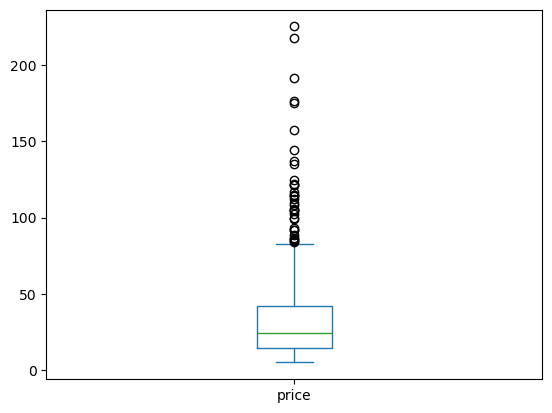

In [2082]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
print(df_mergeweb["price"].plot.box())

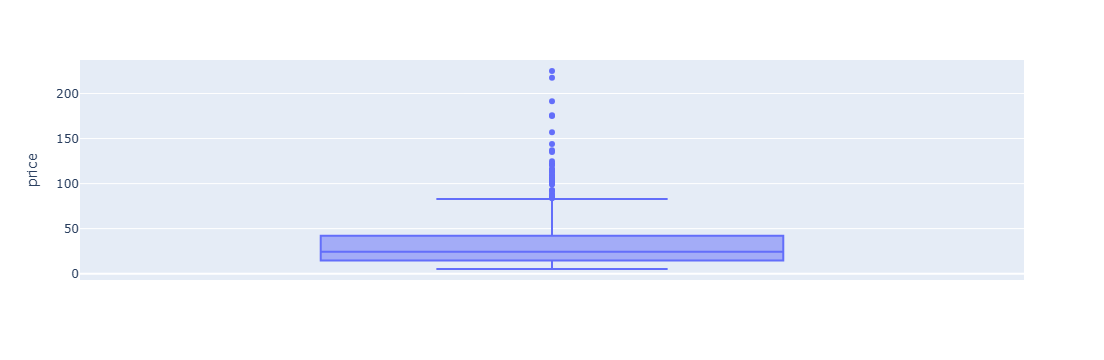

In [2083]:
#Autre méthode avec plotly express
px.box(df_mergeweb, y="price")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [2086]:
#Calculer la moyenne du prix
print ("La moyenne du prix est de "+str(df_mergeweb["price"].mean()))
#Calculer l'écart-type du prix
print("L'écart-type du prix est de "+str(df_mergeweb["price"].std()))
#Calculer le Z-score
from scipy.stats import zscore

z_scores = zscore(df_mergeweb["price"], nan_policy='omit')
print (z_scores.head(10))

La moyenne du prix est de 32.27763636363637
L'écart-type du prix est de 26.603195978591952
0   -0.890570
1    0.328068
2    0.252843
3    1.038940
4   -0.367759
5    1.674587
6    1.132970
7    1.132970
8    0.275411
9    0.756848
Name: price, dtype: float64


In [2087]:
#Quel est le seuil prix dont z-score est supérieur à 3?
z_scores3plus = z_scores[abs(z_scores) > 3]
print ("le seuil prix dont z-score est supérieur à 3 est "+str(z_scores3plus.min()))
print(df_mergeweb.loc[[z_scores3plus.idxmin()], ["price", "product_id"]])

le seuil prix dont z-score est supérieur à 3 est 3.073763674072307
     price  product_id
233  114.0      5918.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [2089]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
print(df_mergeweb.describe())

        product_id  onsale_web       price  stock_quantity  purchase_price  \
count   825.000000  825.000000  825.000000      825.000000      825.000000   
mean   5162.597576    0.867879   32.277636       21.602424       16.940582   
min    3847.000000    0.000000    5.200000        0.000000        2.740000   
25%    4348.000000    1.000000   14.500000        7.000000        7.590000   
50%    4907.000000    1.000000   24.300000       18.000000       12.710000   
75%    5805.000000    1.000000   42.000000       30.000000       22.020000   
max    7338.000000    1.000000  225.000000      145.000000      137.810000   
std     902.644635    0.338828   26.603196       21.917863       14.561840   

       virtual  downloadable  rating_count  average_rating  total_sales  \
count    716.0         716.0         716.0           716.0   716.000000   
mean       0.0           0.0           0.0             0.0     7.930168   
min        0.0           0.0           0.0             0.0   -56.000000 

In [2090]:
#Définissez un seuil pour les articles "outliers" en prix
print("Il y a "+str((df_mergeweb.price > 150).sum())+" produits au dessus de 150 qui devraient être revus")
print(df_mergeweb.loc[df_mergeweb.price > 150, ["price", "product_id"]].head(15))

Il y a 6 produits au dessus de 150 qui devraient être revus
     price  product_id
24   176.0      4402.0
33   157.0      4406.0
204  217.5      5001.0
269  191.3      5892.0
313  175.0      5767.0
567  225.0      4352.0


In [2091]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"



In [2092]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
print(df_mergeweb.loc[df_mergeweb.price > 150, ["price", "product_id","purchase_price"]].head(15))

print(df_mergeweb.loc[df_mergeweb.price < 50, ["price", "product_id","purchase_price"]].head(15))

print ("Le ratio prix de vente moyen/prix d'achat est de " +str (df_mergeweb.price.sum()/(df_mergeweb.purchase_price.sum())))


     price  product_id  purchase_price
24   176.0      4402.0           78.25
33   157.0      4406.0           69.08
204  217.5      5001.0          116.87
269  191.3      5892.0          116.06
313  175.0      5767.0           90.42
567  225.0      4352.0          137.81
    price  product_id  purchase_price
0     8.6      4729.0            4.22
1    41.0      4634.0           20.12
2    39.0      4141.0           24.86
4    22.5      5047.0           13.78
8    39.6      4628.0           21.07
13   29.5      4146.0           17.55
14   37.5      4148.0           21.88
16   49.0      4144.0           27.73
20   19.5      5383.0           10.18
25   12.0      4795.0            6.08
27   14.3      4730.0            7.24
29   26.4      6222.0           13.23
30   42.2      5756.0           25.85
32   49.0      4334.0           30.01
34   15.4      6738.0            8.12
Le ratio prix de vente moyen/prix d'achat est de 1.905344025964548


Bien qu'il y ait des ecarts sur le taux price/pruchase_price selon les produits, les produits "outliers" sont proches de la moyenne. Le prix d'achat est donc relié a la valeur de vente.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [2096]:
##############################
# Calculer le CA su site web #
##############################


In [2097]:
#Créez une colonne calculant le CA par article
df_mergeweb["ca_par_article"] = df_mergeweb["price"]* df_mergeweb["total_sales"]
print (ca_par_article)

product_id
3847.0    145.2
3849.0    308.7
3850.0      0.0
4032.0    169.2
4039.0    138.0
          ...  
7203.0      0.0
7204.0      0.0
7247.0    219.2
7329.0      0.0
7338.0    211.9
Name: ca_par_article, Length: 825, dtype: float64


In [2098]:
#Calculez la somme de la colonne "ca_par_article"
ca_par_article.sum()

143680.1

In [2099]:
###############################
# Palmares des articles en CA #
###############################
#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
ca_par_article.sort_values(ascending=False)

product_id
4352.0    2475.0
5892.0    1147.8
4353.0    1113.0
5826.0     824.0
6212.0     805.0
           ...  
4798.0       0.0
4864.0       0.0
5957.0       0.0
4869.0       0.0
4594.0       0.0
Name: ca_par_article, Length: 825, dtype: float64

In [2100]:
#Réinitialiser l'index du dataset par un reset_index
df_mergeweb.reset_index

<bound method DataFrame.reset_index of      product_id  onsale_web  price  stock_quantity  purchase_price id_web  \
0        4729.0         1.0    8.6            26.0            4.22     38   
1        4634.0         1.0   41.0            11.0           20.12     41   
2        4141.0         1.0   39.0           123.0           24.86    304   
3        5932.0         1.0   59.9            13.0           27.18    523   
4        5047.0         1.0   22.5            76.0           13.78    531   
..          ...         ...    ...             ...             ...    ...   
822      7196.0         0.0   31.0            55.0           31.20    NaN   
823      7200.0         0.0   31.0             6.0           15.54    NaN   
824      7201.0         0.0   31.0            18.0           16.02    NaN   
825      7203.0         0.0   45.0            30.0           23.48    NaN   
826      7204.0         0.0   45.0             9.0           24.18    NaN   

     sku  virtual  downloadable  rat

In [2101]:
#Afficher les 20 premier articles en CA
top20 = ca_par_article.sort_values(ascending=False).head(20)

In [2102]:
top20

product_id
4352.0    2475.0
5892.0    1147.8
4353.0    1113.0
5826.0     824.0
6212.0     805.0
5026.0     781.2
5008.0     735.0
5767.0     700.0
6126.0     675.0
5025.0     672.0
6201.0     633.6
4406.0     628.0
4647.0     627.0
4358.0     616.0
4359.0     599.2
6214.0     594.0
6202.0     582.0
4350.0     556.5
4573.0     537.6
4402.0     528.0
Name: ca_par_article, dtype: float64

In [2103]:
print(df_mergeweb.columns)

Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'purchase_price',
       'id_web', 'sku', 'virtual', 'downloadable', 'rating_count',
       'average_rating', 'total_sales', 'tax_status', 'post_author',
       'post_date', 'post_date_gmt', 'product_type', 'post_title',
       'post_excerpt', 'post_status', 'comment_status', 'ping_status',
       'post_name', 'post_modified', 'post_modified_gmt', 'post_parent',
       'guid', 'menu_order', 'post_type', 'post_mime_type', 'comment_count',
       '_merge', 'ca_par_article'],
      dtype='object')


In [2104]:
top20 = df_mergeweb.sort_values(by="ca_par_article", ascending=False).head(20)

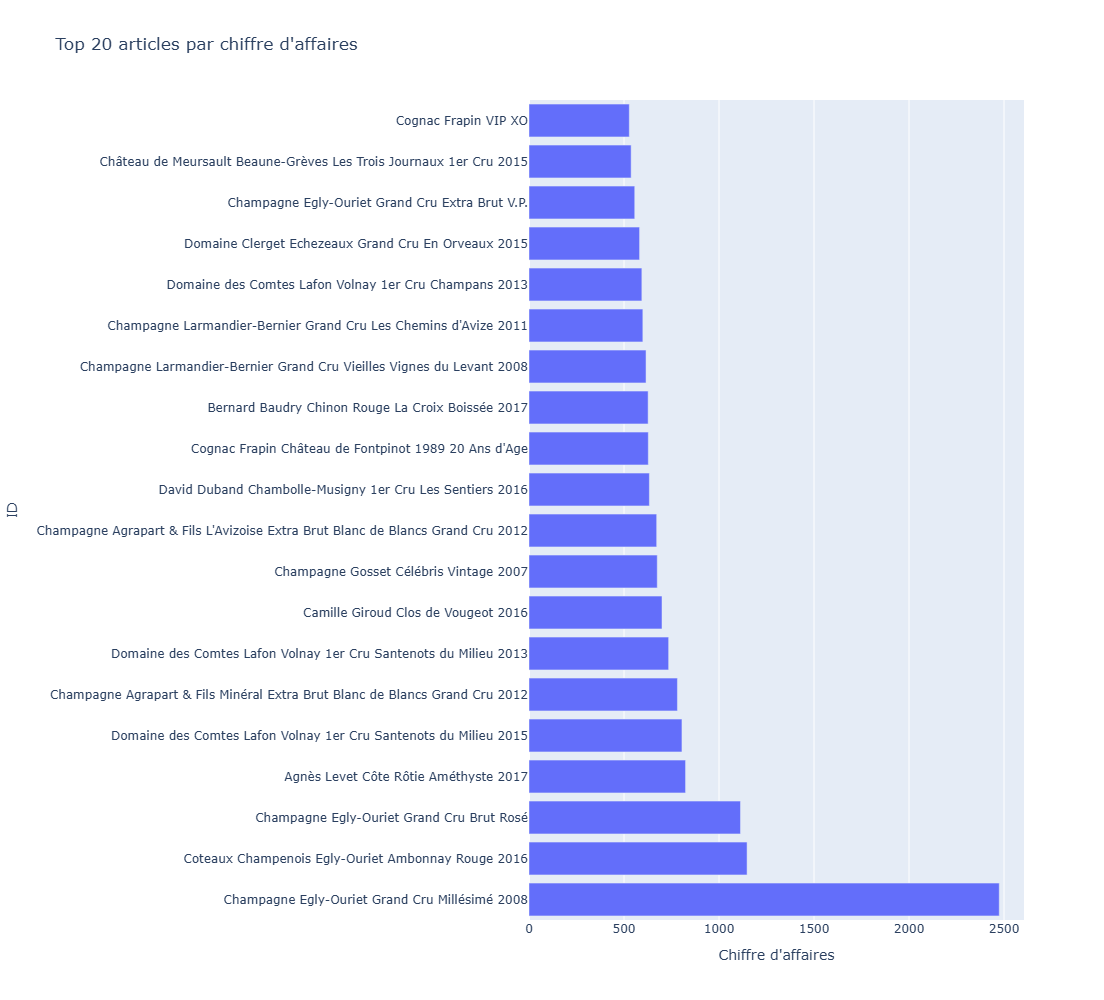

In [2105]:
#Graphique en barre des 20 premiers articles avec plotly express

fig = px.bar(
    top20,
    x="ca_par_article",    
    y="post_title",
    title="Top 20 articles par chiffre d'affaires",
    labels={"ca_par_article": "Chiffre d'affaires", "post_title": "ID"}
)
fig.update_layout(height=1000)
fig.show()

In [2106]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_mergeweb["part_ca"] = df_mergeweb["ca_par_article"] / df_mergeweb["ca_par_article"].sum()
df_mergeweb["part_ca"]
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_mergeweb["cumsum_part_ca"] = df_mergeweb["part_ca"].cumsum()
df_mergeweb["cumsum_part_ca"]
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
articles80ca = (df_mergeweb["cumsum_part_ca"] <= 0.8).sum()
articles80ca

548

In [2107]:
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
df_mergeweb.shape[0]

827

In [2108]:
articles80ca/df_mergeweb.shape[0]*100

66.26360338573156

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [2110]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_qtysalesdown = df_mergeweb.sort_values(by="total_sales", ascending=False)
df_qtysalesdown
#Réinitialiser l'index du dataset par un reset_index
df_qtysalesdown.reset_index()
#Afficher les 20 premier articles en quantité
df_qtysalesdown.head(20)


product_id  onsale_web  price  stock_quantity  purchase_price id_web  \
636      4867.0         1.0    9.9           121.0            4.86  16148   
377      4203.0         1.0    9.9            74.0            5.01  15415   
250      4275.0         1.0   14.9            62.0            7.78  14864   
262      4726.0         1.0   12.7             0.0            6.82  14950   
710      4647.0         1.0   28.5            45.0           14.14  16525   
349      5826.0         1.0   41.2            34.0           21.71  15325   
201      6129.0         1.0    5.2            68.0            2.74  14570   
497      4220.0         1.0   11.6            48.0            5.75  15758   
418      5778.0         1.0    5.8            44.0            3.09  15561   
468      6569.0         1.0   29.0            58.0           15.28  15705   
126      5803.0         1.0   17.1            47.0            9.19  13572   
670      4188.0         1.0    9.5            51.0            5.06  16265   
179      5777.0         1.0    5.7            51.0            3.03  14338   
637      4870.0         1.0    9.3             0.0            4.81  16149   
684      5695.0         1.0    6.5            33.0            3.53  16304   
706      4105.0         1.0    6.8            45.0            3.51  16504   
674      4059.0         1.0    8.7            34.0            4.32  16275   
664      4863.0         1.0    8.2            54.0            4.11  16255   
572      4306.0         1.0   10.7            52.0            5.31  15949   
451      4261.0         1.0    9.9            48.0            5.01  15662   

       sku  virtual  downloadable  rating_count  average_rating  total_sales  \
636  16148      0.0           0.0           0.0             0.0         36.0   
377  15415      0.0           0.0           0.0             0.0         27.0   
250  14864      0.0           0.0           0.0             0.0         24.0   
262  14950      0.0           0.0           0.0             0.0         22.0   
710  16525      0.0           0.0           0.0             0.0         22.0   
349  15325      0.0           0.0           0.0             0.0         20.0   
201  14570      0.0           0.0           0.0             0.0         20.0   
497  15758      0.0           0.0           0.0             0.0         18.0   
418  15561      0.0           0.0           0.0             0.0         17.0   
468  15705      0.0           0.0           0.0             0.0         17.0   
126  13572      0.0           0.0           0.0             0.0         17.0   
670  16265      0.0           0.0           0.0             0.0         16.0   
179  14338      0.0           0.0           0.0             0.0         16.0   
637  16149      0.0           0.0           0.0             0.0         16.0   
684  16304      0.0           0.0           0.0             0.0         16.0   
706  16504      0.0           0.0           0.0             0.0         16.0   
674  16275      0.0           0.0           0.0             0.0         16.0   
664  16255      0.0           0.0           0.0             0.0         16.0   
572  15949      0.0           0.0           0.0             0.0         15.0   
451  15662      0.0           0.0           0.0             0.0         15.0   

    tax_status  post_author           post_date       post_date_gmt  \
636    taxable          2.0 2018-05-03 13:20:05 2018-05-03 11:20:05   
377    taxable          2.0 2018-02-15 14:33:42 2018-02-15 13:33:42   
250    taxable          2.0 2018-02-27 13:33:54 2018-02-27 12:33:54   
262    taxable          2.0 2018-04-18 11:53:51 2018-04-18 09:53:51   
710    taxable          2.0 2018-04-17 09:28:58 2018-04-17 07:28:58   
349    taxable          2.0 2019-03-27 17:59:49 2019-03-27 16:59:49   
201    taxable          2.0 2019-06-28 18:01:06 2019-06-28 16:01:06   
497    taxable          2.0 2018-02-16 10:54:27 2018-02-16 09:54:27   
418    taxable          2.0 2019-03-15 10:20:59 2019-03-15 09:20:59

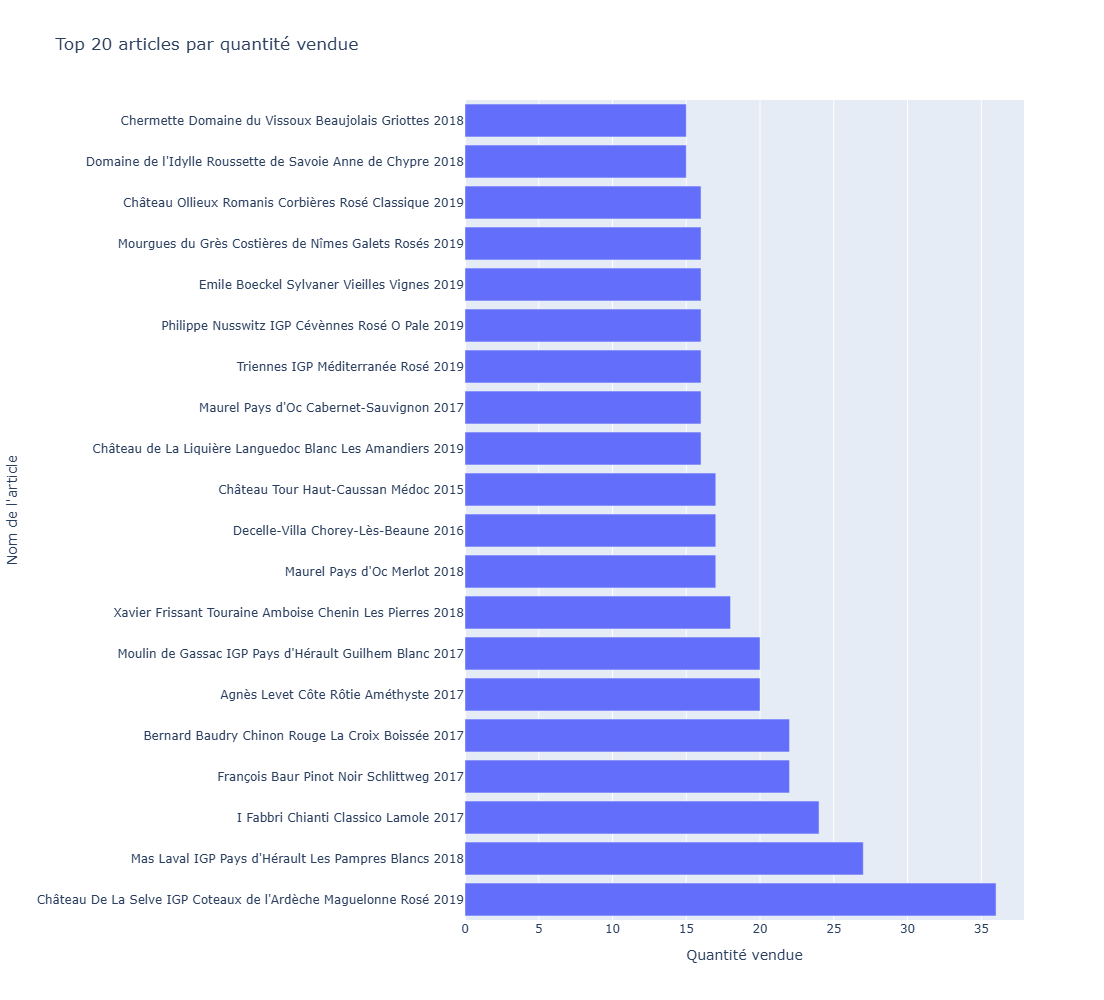

In [2111]:
#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(
    df_qtysalesdown.head(20),
    x="total_sales",
    y="post_title",
    orientation="h",
    title="Top 20 articles par quantité vendue",
    labels={"total_sales": "Quantité vendue", "post_title": "Nom de l'article"}
)

fig.update_layout(height=1000)

fig.show()


In [2112]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_mergeweb["part_qty"] = df_mergeweb["total_sales"] / df_mergeweb["total_sales"].sum()
df_mergeweb["part_qty"]
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_mergeweb["cumsum_part_qty"] = df_mergeweb["part_qty"].cumsum()
df_mergeweb["cumsum_part_qty"]
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
articles_80_qty = (df_mergeweb["cumsum_part_qty"] <= 0.8).sum()
articles_80_qty

588

In [2113]:
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion_articles_80 = articles_80_qty / df_mergeweb.shape[0]*100
print (proportion_articles_80)

71.10036275695283


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

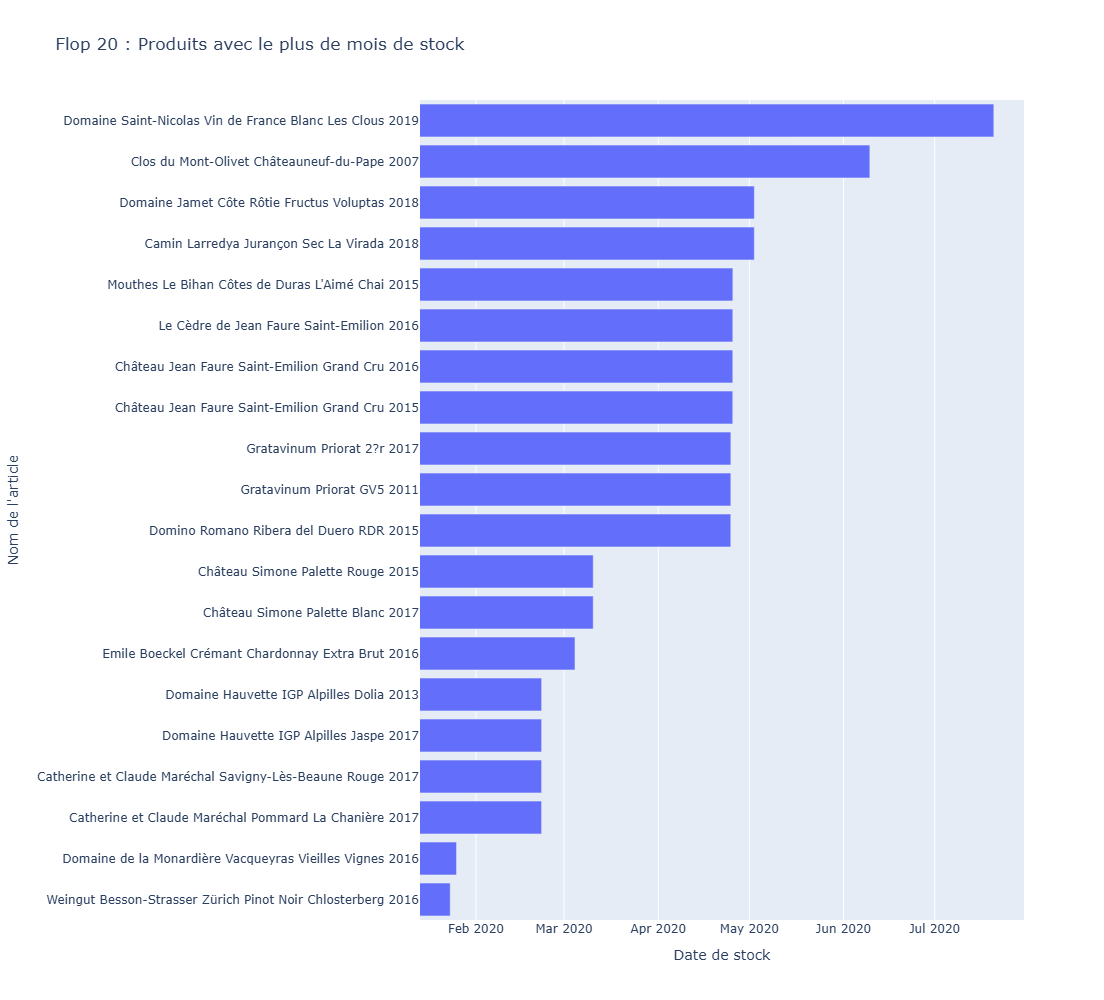

In [2115]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy 
import numpy as np
#Création de la colonne Rotation de stock
df_mergeweb["rotation_stock"] = df_mergeweb["total_sales"] / df_mergeweb["stock_quantity"]
#Remplacement des "inf" par 0
df_mergeweb.replace([np.inf, -np.inf], 0, inplace=True)
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_mois_stock_sorted = df_mergeweb.sort_values(by="post_date", ascending=False)
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
fig = px.bar(
    df_mois_stock_sorted.head(20),
    x="post_date",
    y="post_title",
    orientation="h",
    title="Flop 20 : Produits avec le plus de mois de stock",
    labels={"post_date": "Date de stock", "post_title": "Nom de l'article"}
   
)
fig.update_layout(height=1000)
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()

In [2116]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_mergeweb["valorisation_stock_euros"] = df_mergeweb["stock_quantity"] * df_mergeweb["purchase_price"]
#Calculer la somme de la colonne "Valorisation_stock_euros"
total_valorisation = df_mergeweb["valorisation_stock_euros"].sum()
total_valorisation 


298627.66000000003

In [2117]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity

total_stockqty = df_mergeweb["stock_quantity"].sum()
total_stockqty

17822.0

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [2119]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
df_mergeweb["prix_ht"] = df_mergeweb["price"] /1.20
#Création de la colonne Taux de marge
df_mergeweb["taux_marge"] = (df_mergeweb["prix_ht"] - df_mergeweb["purchase_price"]) / df_mergeweb["prix_ht"]
#Afficher le prix minimum de la colonne "taux_marge"
print (df_mergeweb["taux_marge"].min())
#Afficher le prix maximum de la colonne "taux_marge"
print (df_mergeweb["taux_marge"].max())

-6.3498814229249
0.477568


In [2120]:
#affichage de la ligne avec un taux de marge inférieur à 0
df_mergeweb[df_mergeweb["taux_marge"] < 0]

product_id  onsale_web  price  stock_quantity  purchase_price id_web  \
79       4355.0         1.0  12.65            97.0           77.48  12589   
303      4864.0         0.0   8.30             0.0            9.99  15154   
772      6324.0         0.0  92.00            18.0           99.00    NaN   
822      7196.0         0.0  31.00            55.0           31.20    NaN   

       sku  virtual  downloadable  rating_count  average_rating  total_sales  \
79   12589      0.0           0.0           0.0             0.0          0.0   
303    NaN      NaN           NaN           NaN             NaN          NaN   
772    NaN      NaN           NaN           NaN             NaN          NaN   
822    NaN      NaN           NaN           NaN             NaN          NaN   

    tax_status  post_author           post_date       post_date_gmt  \
79     taxable          2.0 2018-03-02 10:46:10 2018-03-02 09:46:10   
303        NaN          NaN                 NaT                 NaT   
772        NaN          NaN                 NaT                 NaT   
822        NaN          NaN                 NaT                 NaT   

    product_type                                      post_title  \
79     Champagne  Champagne Egly-Ouriet Grand Cru Blanc de Noirs   
303          NaN                                             NaN   
772          NaN                                             NaN   
822          NaN                                             NaN   

                                          post_excerpt post_status  \
79   Le Blanc de Noirs représente le meilleur du sa...     publish   
303                                                NaN         NaN   
772                                                NaN         NaN   
822                                                NaN         NaN   

    comment_status ping_status  \
79          closed      closed   
303            NaN         NaN   
772            NaN         NaN   
822            NaN         NaN   

                                             post_name       post_modified  \
79   champagne-egly-ouriet-grand-cru-brut-blanc-de-... 2020-08-13 10:15:02   
303                                                NaN                 NaT   
772                                                NaN                 NaT   
822                                                NaN                 NaT   

      post_modified_gmt  post_parent  \
79  2020-08-13 08:15:02          0.0   
303                 NaT          NaN   
772                 NaT          NaN   
822                 NaT          NaN   

                                                  guid  menu_order post_type  \
79   https://www.bottle-neck.fr/?post_type=product&...         0.0   product   
303                                                NaN         NaN       NaN   
772                                                NaN         NaN       NaN   
822                                                NaN         NaN       NaN   

     post_mime_type  comment_count     _merge  ca_par_article  part_ca  \
79              NaN            0.0       both             0.0      0.0   
303             NaN            NaN  left_only             NaN      NaN   
772             NaN            NaN  left_only             NaN      NaN   
822             NaN            NaN  left_only             NaN      NaN   

     cumsum_part_ca  part_qty  cumsum_part_qty  rotation_stock  \
79         0.138239       0.0         0.080134             0.0   
303             NaN       NaN              NaN             NaN   
772             NaN       NaN              NaN             NaN   
822             NaN       NaN              NaN             NaN   

     valorisation_stock_euros    prix_ht  taux_marge  
79                    7515.56  10.541667   -6.349881  
303                      0.00   6.916667   -0.444337  
772                   1782.00  76.666667   -0.291304  
822                   1716.00  25.833333   -0.207742

In [2121]:
#création d'un dataframe avec les taux positifs
df_marge_positive = df_mergeweb[df_mergeweb["taux_marge"] > 0]
#Afficher le prix minimum de la colonne "taux_marge"
print(df_marge_positive["taux_marge"].min())
#Afficher le prix maximum de la colonne "taux_marge"
print(df_marge_positive["taux_marge"].max())

0.22778625954198473
0.477568


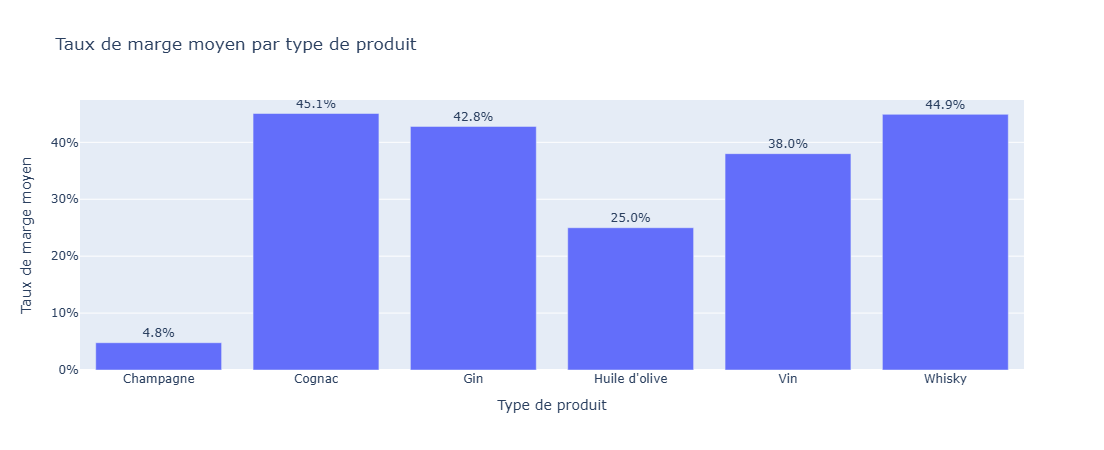

In [2149]:
#création d'un dataframe avec le taux de marge moyen par type de produit
df_marge_par_type = df_mergeweb.groupby("product_type", as_index=False)["taux_marge"].mean()
#Affichage dans un graphique du taux de marge par type de produit
fig = px.bar(
    df_marge_par_type,
    x="product_type",
    y="taux_marge",
    title="Taux de marge moyen par type de produit",
    labels={"product_type": "Type de produit", "taux_marge": "Taux de marge moyen"},
    text="taux_marge"
)
fig.update_layout(height=450)
fig.update_traces(texttemplate='%{text:.1%}', textposition='outside')
fig.update_layout(yaxis_tickformat=".0%", uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

In [2124]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns
#Création d'un heatmap de correlation avec les variables stock, sales et price
corr_vars = df_mergeweb[["stock_quantity", "total_sales", "price"]]
corr_vars

stock_quantity  total_sales  price
0              26.0         10.0    8.6
1              11.0          6.0   41.0
2             123.0          8.0   39.0
3              13.0          0.0   59.9
4              76.0          8.0   22.5
..              ...          ...    ...
822            55.0          NaN   31.0
823             6.0          NaN   31.0
824            18.0          NaN   31.0
825            30.0          NaN   45.0
826             9.0          NaN   45.0

[827 rows x 3 columns]

<Axes: >

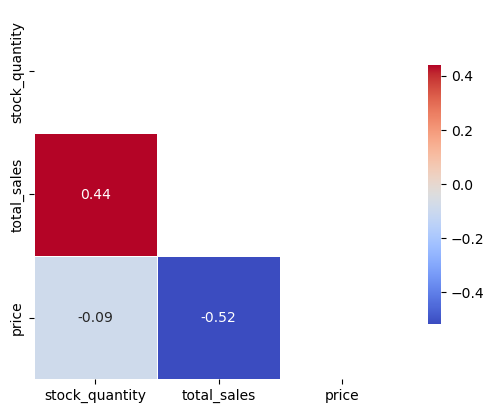

In [2125]:
#on peut également créer un mask pour n'afficher qu'une demi heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .7}
)

#Que peut-on conclure des correlations ?

Les articles avec plus de stock sont généralement ceux qui se vendent le mieux.


Les articles les plus chers ont tendance à moins se vendre


il n'y a pas de lien significatif entre le prix et la quantité en stock (stock non géré en fonction de la valeur produit?)




<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [2129]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
df_mergeweb.to_excel(r"C:\Users\guill\Desktop\df_webmerge.xlsx", index=False)

df_mergeweb[df_mergeweb["product_id"] == 6594]
df_erp[df_erp["product_id"] == 5017]
df_erp[df_erp["product_id"] == 4233]

In [2131]:
df_mergeweb[df_mergeweb["product_id"] == 6594]

product_id  onsale_web  price  stock_quantity  purchase_price id_web  \
774      6594.0         0.0    9.1            19.0            4.61    NaN   

     sku  virtual  downloadable  rating_count  average_rating  total_sales  \
774  NaN      NaN           NaN           NaN             NaN          NaN   

    tax_status  post_author post_date post_date_gmt product_type post_title  \
774        NaN          NaN       NaT           NaT          NaN        NaN   

    post_excerpt post_status comment_status ping_status post_name  \
774          NaN         NaN            NaN         NaN       NaN   

    post_modified post_modified_gmt  post_parent guid  menu_order post_type  \
774           NaT               NaT          NaN  NaN         NaN       NaN   

     post_mime_type  comment_count     _merge  ca_par_article  part_ca  \
774             NaN            NaN  left_only             NaN      NaN   

     cumsum_part_ca  part_qty  cumsum_part_qty  rotation_stock  \
774             NaN       NaN              NaN             NaN   

     valorisation_stock_euros   prix_ht  taux_marge  
774                     87.59  7.583333    0.392088

In [2133]:
df_mergeweb[df_mergeweb["product_id"] == 5017]

product_id  onsale_web  price  stock_quantity  purchase_price id_web  \
762      5017.0         0.0    8.0             0.0            4.34    NaN   

     sku  virtual  downloadable  rating_count  average_rating  total_sales  \
762  NaN      NaN           NaN           NaN             NaN          NaN   

    tax_status  post_author post_date post_date_gmt product_type post_title  \
762        NaN          NaN       NaT           NaT          NaN        NaN   

    post_excerpt post_status comment_status ping_status post_name  \
762          NaN         NaN            NaN         NaN       NaN   

    post_modified post_modified_gmt  post_parent guid  menu_order post_type  \
762           NaT               NaT          NaN  NaN         NaN       NaN   

     post_mime_type  comment_count     _merge  ca_par_article  part_ca  \
762             NaN            NaN  left_only             NaN      NaN   

     cumsum_part_ca  part_qty  cumsum_part_qty  rotation_stock  \
762             NaN       NaN              NaN             NaN   

     valorisation_stock_euros   prix_ht  taux_marge  
762                       0.0  6.666667       0.349

In [2135]:
df_mergeweb[df_mergeweb["product_id"] == 4233]

product_id  onsale_web  price  stock_quantity  purchase_price id_web  \
741      4233.0         0.0   20.0             0.0           10.33    NaN   

     sku  virtual  downloadable  rating_count  average_rating  total_sales  \
741  NaN      NaN           NaN           NaN             NaN          NaN   

    tax_status  post_author post_date post_date_gmt product_type post_title  \
741        NaN          NaN       NaT           NaT          NaN        NaN   

    post_excerpt post_status comment_status ping_status post_name  \
741          NaN         NaN            NaN         NaN       NaN   

    post_modified post_modified_gmt  post_parent guid  menu_order post_type  \
741           NaT               NaT          NaN  NaN         NaN       NaN   

     post_mime_type  comment_count     _merge  ca_par_article  part_ca  \
741             NaN            NaN  left_only             NaN      NaN   

     cumsum_part_ca  part_qty  cumsum_part_qty  rotation_stock  \
741             NaN       NaN              NaN             NaN   

     valorisation_stock_euros    prix_ht  taux_marge  
741                       0.0  16.666667      0.3802

In [2155]:
df_mergeweb[df_mergeweb["post_title"] == "Pierre Jean Villa Condrieu Jardin Suspendu 2018"]

product_id  onsale_web  price  stock_quantity  purchase_price id_web  \
733         NaN         NaN    NaN             NaN             NaN    NaN   

                        sku  virtual  downloadable  rating_count  \
733  article_a_investiguer1      0.0           0.0           0.0   

     average_rating  total_sales tax_status  post_author           post_date  \
733             0.0        -56.0    taxable          2.0 2018-08-08 11:23:43   

          post_date_gmt product_type  \
733 2018-08-08 09:23:43          Vin   

                                          post_title  \
733  Pierre Jean Villa Condrieu Jardin Suspendu 2018   

                                          post_excerpt post_status  \
733  <span id="u1194-83">Le nez séduit par ses parf...     publish   

    comment_status ping_status                                 post_name  \
733         closed      closed  pierre-jean-villa-condrieu-suspendu-2018   

          post_modified   post_modified_gmt  post_parent  \
733 2019-11-02 13:24:01 2019-11-02 12:24:01          0.0   

                                                  guid  menu_order post_type  \
733  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   

     post_mime_type  comment_count      _merge  ca_par_article  part_ca  \
733             NaN            0.0  right_only             NaN      NaN   

     cumsum_part_ca  part_qty  cumsum_part_qty  rotation_stock  \
733             NaN -0.009863         1.001761             NaN   

     valorisation_stock_euros  prix_ht  taux_marge  
733                       NaN      NaN         NaN

In [2159]:
df_mergeweb[df_mergeweb["post_title"] == "Pierre Jean Villa Côte Rôtie Fongeant 2017"]

product_id  onsale_web  price  stock_quantity  purchase_price id_web  \
734         NaN         NaN    NaN             NaN             NaN    NaN   

                        sku  virtual  downloadable  rating_count  \
734  article_a_investiguer2      0.0           0.0           0.0   

     average_rating  total_sales tax_status  post_author           post_date  \
734             0.0        -17.0    taxable          2.0 2018-07-31 12:07:23   

          post_date_gmt product_type  \
734 2018-07-31 10:07:23          Vin   

                                     post_title  \
734  Pierre Jean Villa Côte Rôtie Fongeant 2017   

                                          post_excerpt post_status  \
734  Fongeant 2017 explose sur un fruit brillant, p...     publish   

    comment_status ping_status                                   post_name  \
734         closed      closed  pierre-jean-villa-cote-rotie-fongeant-2017   

          post_modified   post_modified_gmt  post_parent  \
734 2019-11-02 13:24:15 2019-11-02 12:24:15          0.0   

                                                  guid  menu_order post_type  \
734  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   

     post_mime_type  comment_count      _merge  ca_par_article  part_ca  \
734             NaN            0.0  right_only             NaN      NaN   

     cumsum_part_ca  part_qty  cumsum_part_qty  rotation_stock  \
734             NaN -0.002994         0.998767             NaN   

     valorisation_stock_euros  prix_ht  taux_marge  
734                       NaN      NaN         NaN